# K Means  - Clustering Algorithm

## First we need to import the packages that we are going to use
Import packages for analysis of data

In [1]:
import numpy as np 
import pandas as pd

### Url for dataset that is to be used

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

### Assign dataset column names 
#### Read the dataset to pandas dataframe

In [3]:

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names) 



### Inspect dataset

In [4]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Obtain only the values for the clustering algorithm. Without the classes

In [5]:
data = dataset.iloc[:,[0,1,2,3]].values

### Check data

In [6]:
data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

### View all data only from the first column 

In [7]:
data[:,0]

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

### Plot graphs for sepal width and length 

Import packages to plot graphs 

In [8]:
import matplotlib.pyplot as plt  

### plot graph of sepal data

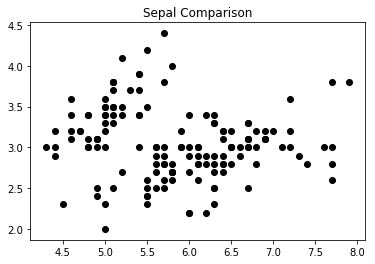

In [9]:
plt.scatter(data[:,0],data[:,1], c= 'k')
plt.title('Sepal Comparison')  
plt.show()
# ask class to add title and color

## Plot petal width and length 

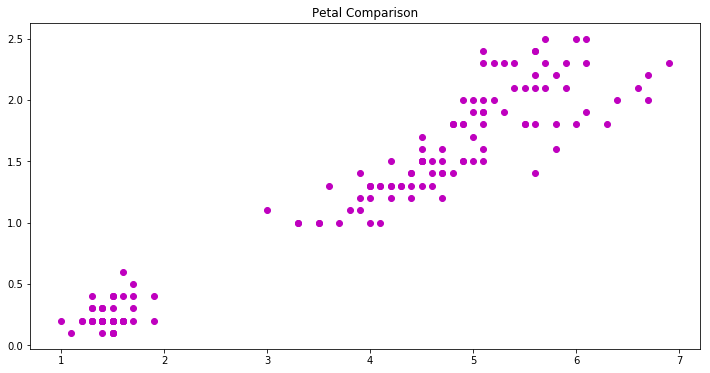

In [10]:
plt.figure(figsize=(12, 6))  
plt.scatter(data[:,2],data[:,3], c= 'm')
plt.title('Petal Comparison')  
plt.show()
# ask them to label x and y 

## Unsupervised Machine Learning

Import packages to conduct machine learning 

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

### View the suitable number of clusters for the given dataset

#### Run the k-means algorithm to determine suitable number of clusters for this dataset

In [38]:
w = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3) 
    kmeans.fit(data)
    w.append(kmeans.inertia_)

### Plotting the results onto a line graph 
The graph below is called an elbow graph.

At the elbow of the graph, the position where the graph turns, is the most suitable number of clusters that should be made

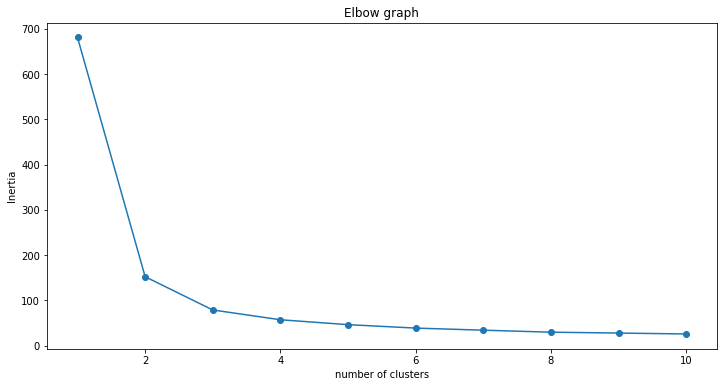

In [39]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), w,marker = 'o')
plt.title('Elbow graph')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()

More reading on elbow graph below 

https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

# Applying k-means 

### run the machine learning algorithm with the number of classes obtained 

In [12]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10 , random_state = 0 )

### obtain the predicted values of the classes

In [13]:
pred = kmeans.fit_predict(data)

## Calculate the accuracy of the model 

### Now that we have seen the data plotted lets calculate the accuracy of the model 

### First lets see the predicted values, what did it give, numerically

In [14]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
dataset['Class'].values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

### we can see that the values in the setosa group is labelled as 1, versicolor is labelled as 0 and virginica is labelled as 2

### now make a new list with the values of the classes labelled as 0, 1 and 2 to allow for the accuracy to the calculated

#### Accuracy 

In [16]:
actual = []

In [17]:

for i in dataset['Class']:
    if i == 'Iris-setosa':
        actual.append(1)
        
    elif i == 'Iris-versicolor':
        actual.append(0)
        
    else:
        actual.append(2)

In [18]:
actual

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

### Calculate the accuracy of the model using the scikit learn function

In [19]:

accuracy_score(actual, pred)

0.89333333333333331

### Draw graph for prediction 

In [20]:
# obtain only 0 values
pred == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,

In [21]:
data[:,0]

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

In [22]:
# returns values which are True(=0) in pred. in column 0 of data
data[pred == 0,0]

array([ 7. ,  6.4,  5.5,  6.5,  5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,
        6. ,  6.1,  5.6,  6.7,  5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,
        6.1,  6.4,  6.6,  6.8,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,
        6. ,  6.7,  6.3,  5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,
        5.7,  6.2,  5.1,  5.7,  5.8,  4.9,  5.7,  5.8,  6. ,  5.6,  6.3,
        6.2,  6.1,  6.3,  6. ,  5.8,  6.3,  5.9])

### Sepal Length and Width 

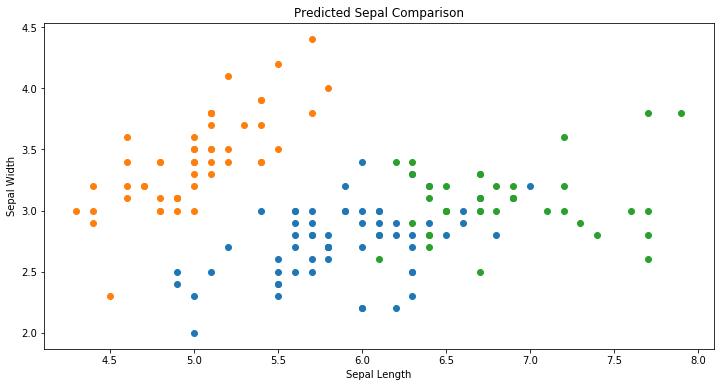

In [23]:
####Predited sepal length and width
plt.figure(figsize=(12, 6))  
plt.scatter(data[pred == 0, 0],data[pred == 0, 1])
plt.scatter(data[pred == 1, 0],data[pred == 1, 1])
plt.scatter(data[pred == 2, 0],data[pred == 2, 1])


plt.title('Predicted Sepal Comparison')  
plt.xlabel('Sepal Length')  
plt.ylabel("Sepal Width")  
plt.show()

#### View the plot of the actual data

#### Seperate data according to their Class to plot 

In [24]:
dataset['Class'] =='Iris-setosa'

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Name: Class, Length: 150, dtype: bool

In [25]:
setosa = dataset[dataset['Class'] == 'Iris-setosa']
virginica  = dataset[dataset['Class'] == 'Iris-virginica']
versicolor = dataset[dataset['Class'] == 'Iris-versicolor']

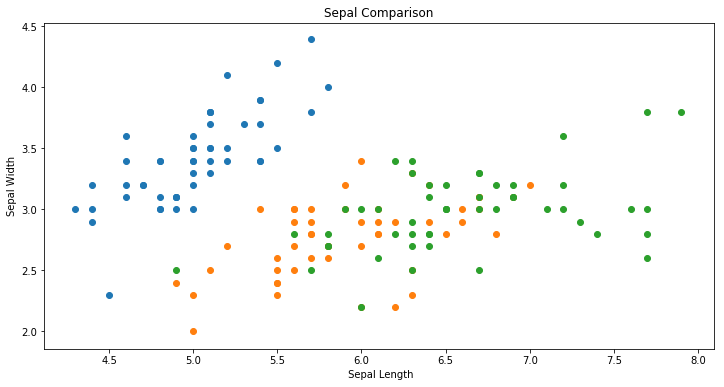

In [26]:
#Actual sepal length and width
plt.figure(figsize=(12, 6))  
plt.scatter(setosa['sepal-length'],setosa['sepal-width'])
plt.scatter(versicolor['sepal-length'],versicolor['sepal-width'])
plt.scatter(virginica['sepal-length'],virginica['sepal-width'])

plt.title('Sepal Comparison')  
plt.xlabel(' Sepal Length')  
plt.ylabel("Sepal Width")  
plt.show()

### Petal Length and Width

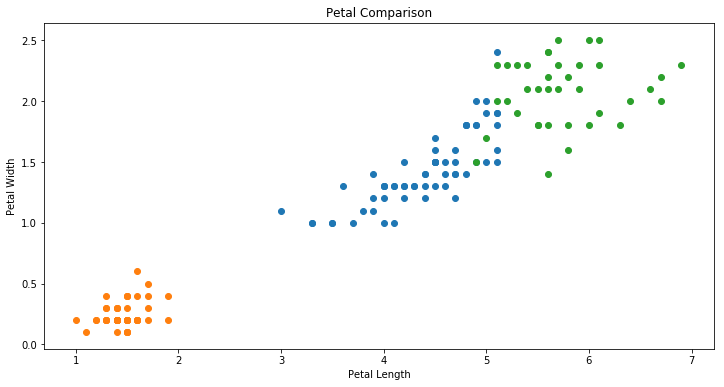

In [28]:
####Predited Petal length and width 
plt.figure(figsize=(12, 6))  
plt.scatter(data[pred == 0, 2],data[pred == 0, 3])
plt.scatter(data[pred == 1, 2],data[pred == 1, 3])
plt.scatter(data[pred == 2, 2],data[pred == 2, 3])


plt.title('Petal Comparison')  
plt.xlabel('Petal Length')  
plt.ylabel("Petal Width")  
plt.show()

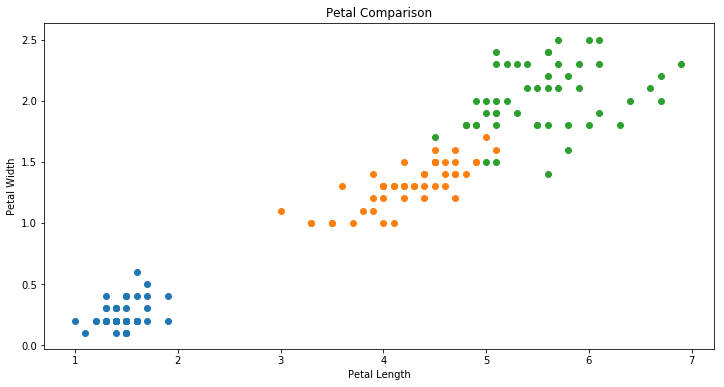

In [29]:
##### Actual Petal length and width 
plt.figure(figsize=(12, 6))  
plt.scatter(setosa['petal-length'],setosa['petal-width'])
plt.scatter(versicolor['petal-length'],versicolor['petal-width'])
plt.scatter(virginica['petal-length'],virginica['petal-width'])



plt.title('Petal Comparison')  
plt.xlabel('Petal Length')  
plt.ylabel("Petal Width")  
plt.show()

### Plot actual and predicted data side by side 

#### Predicted & Actual Petal length and width

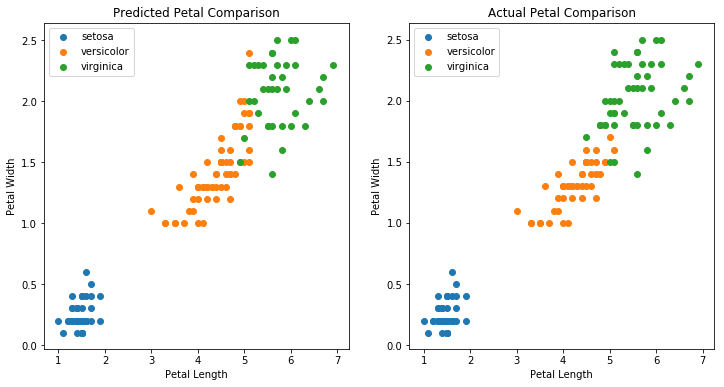

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

#predicted 

plt.scatter(data[pred==1, 2], data[pred==1,3])
plt.scatter(data[pred==0, 2], data[pred==0,3])
plt.scatter(data[pred==2, 2], data[pred==2,3])

plt.legend(['setosa','versicolor','virginica'])
plt.title('Predicted Petal Comparison')  
plt.xlabel('Petal Length')  
plt.ylabel("Petal Width")  

# actual 

plt.subplot(1, 2, 2)
plt.scatter(setosa['petal-length'], setosa['petal-width'])
plt.scatter(versicolor['petal-length'], versicolor['petal-width'])
plt.scatter(virginica['petal-length'], virginica['petal-width'])

plt.legend(['setosa','versicolor','virginica'])
plt.title('Actual Petal Comparison')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


plt.show()

#### Predicted & Actual Petal length and width

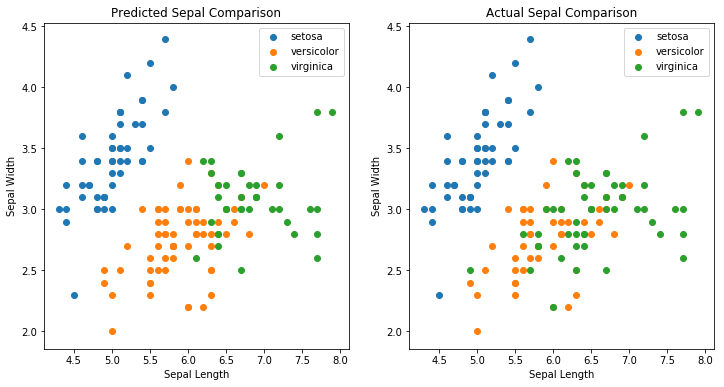

In [37]:


# actual 
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

## Predicted sepal length and width

plt.scatter(data[pred==1, 0], data[pred==1,1])
plt.scatter(data[pred==0, 0], data[pred==0,1])
plt.scatter(data[pred==2, 0], data[pred==2,1])

plt.legend(['setosa','versicolor','virginica'])
plt.title('Predicted Sepal Comparison')  
plt.xlabel('Sepal Length')  
plt.ylabel("Sepal Width") 

plt.subplot(1, 2, 2)

# Actual Sepal Length and Width 
plt.scatter(setosa['sepal-length'], setosa['sepal-width'])
plt.scatter(versicolor['sepal-length'], versicolor['sepal-width'])
plt.scatter(virginica['sepal-length'], virginica['sepal-width'])

plt.legend(['setosa','versicolor','virginica'])
plt.title('Actual Sepal Comparison')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')


 


plt.show()

### references 
### https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset 
